# 전체 구조

먼저 encoder 에서는, 

입력 임베딩으로 입력시퀀스를 벡터로 만들어준다. 

positional Encoding 을 통해 위치 정보를 만들고 입력 벡터에 더해준다 (→ 1)

token당 q,k,v layer을 통해 self attention 연산을 진행한다 (→ 2)

(그리고 이 결과값은 decoder의 masked multi head attention을 타고 나온 연산값 이후에 추가해줄 것이다)

decoder 에서는 

positional Encoding 을 통해 위치 정보를 만들어주고 (→ 1)

masked multi head attention(→ 3)을 통해 self attention 연산을 진행한다.

그리고 encoder에서 연산된 q,k,v 값들을 받아 다시한번 encoder decoder attention 연산을 진행한다. (→ 4)

그리고 fc layer과 softmax를 통해 분류 확률값을 도출한다.

# 1. positional Encoding

positional Encoding은 시계열 데이터를 순서대로 넣는 대신 순서에 대한 정보를 따로 들고 있어줌으로써 시계열 데이터를 병렬적으로(한꺼번에) 보겠다는 아이디어를 실현 시켜주었다.

이 positional encoder을 만들때 input 길이에 따라서 이 Encoding 값이 편차가 커버리면 안된다. 
왜냐면 그렇게 되면 이 자체의 영향력이 너무 커져서 단어 의미에 대한 벡터값이 무시되는 이슈가 생길 수 있기 때문이다.

하지만, 1/n로 스케일링하자니, 10개 단어로 이루어진 문장의 두번째 자리와 50개 단어로 이루어진 문장의 두번째 자리값의 차이가 생겨버린다. 

이 encoding **본질적인 목적은 무수한 데이터의 단어간 거리를 학습하고자 하는것**인데 의도하는것과 달라진다.


그렇다면 주기함수를 이용하면 문제가 해결되지 않을까? 라는 아이디어가 생겼다.

하지만, 주기함수를 쓸때의 문제점이 있었는데 반복되다보니 다른 자리인데 같은 값을 갖는 경우가 나타날 수 있다는 것이다.

그래서 cos, sin함수를 모두 사용하고 각 embedding의 차원별로 두 함수를 번갈아가며 사용하는 방법론을 채택했다. 아래 수식을 보면 embedding차원이 짝수이면 sin함수를, 홀수면 cos함수를 사용하는 것을 확인할 수 있다.


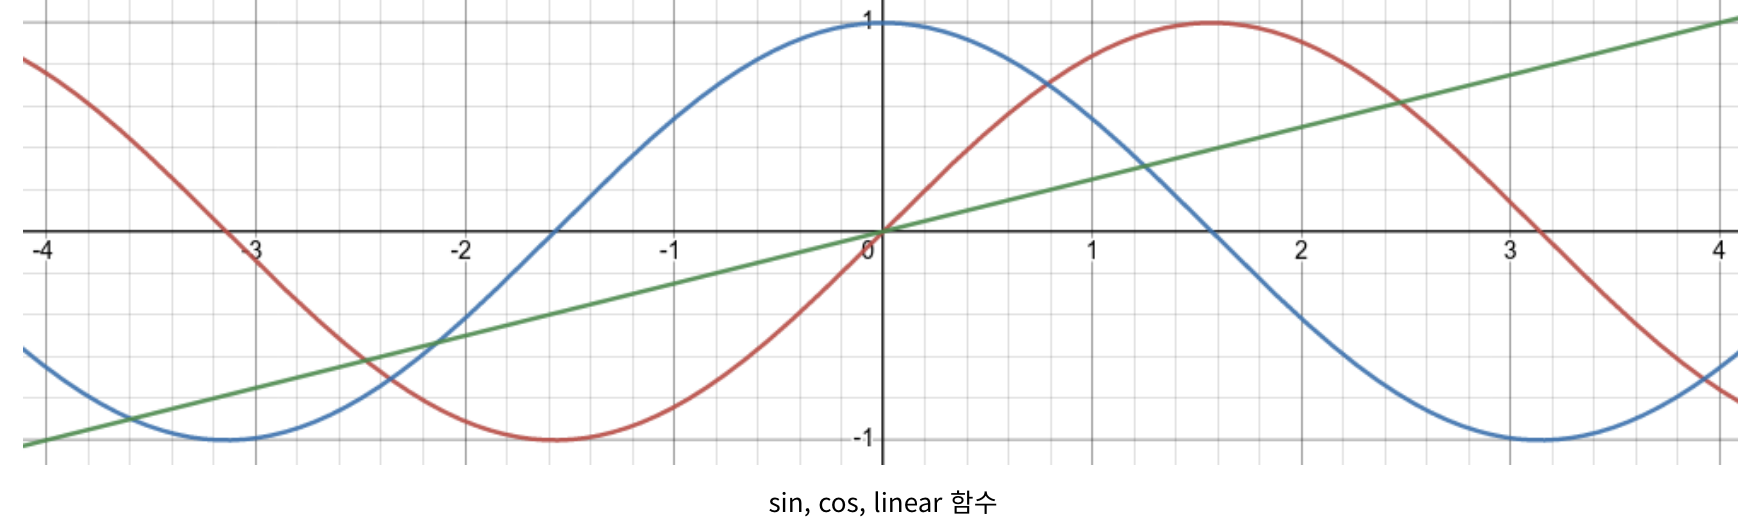

In [1]:
from IPython.display import Image
image_path = '../images/PE_graph.png'
Image(filename=image_path)

아래 그림은 10개 단어의 문장, 50개로 이루어진 문장을 positional encoding 한 후 단어 사이의 거리를 시각화 한것이다(앞 10개의 토큰)

10개의 단어로 이루어진 문장이든 50개로 이루어진 문장이든 순서값에 따라 동일한 간격을 갖을 수 있게 되는것을 확인해 볼 수 있다.

따라서 위의 방법을 사용하면 문장의 길이가 달라지더라도 단어 사이의 거리를 보존할 수 있게 된다

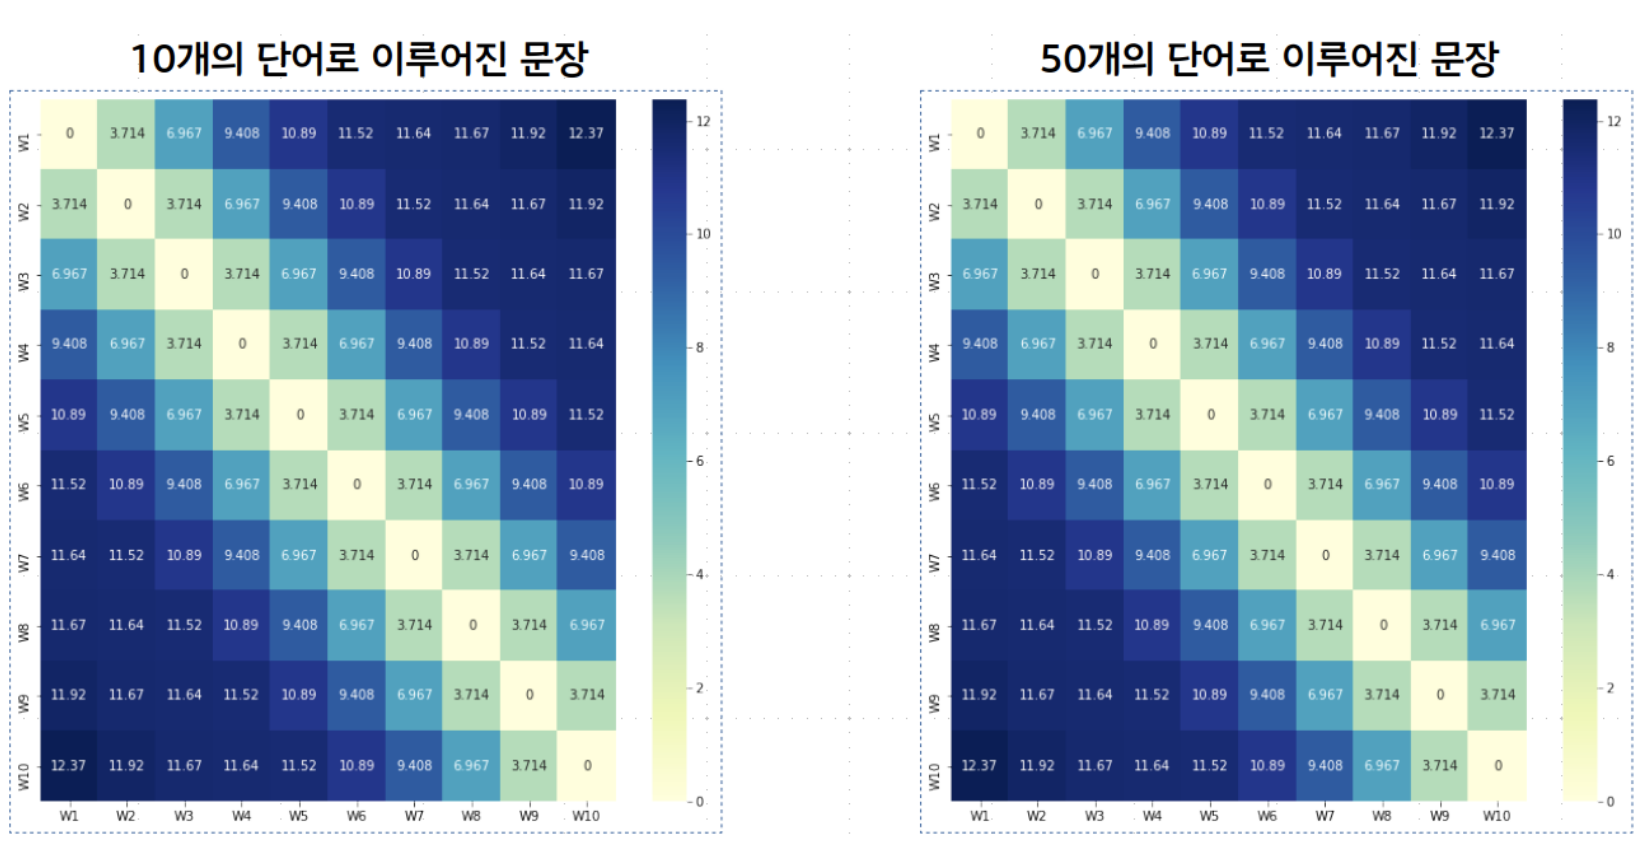

In [2]:
from IPython.display import Image
image_path = '../images/PE_exam.png'
Image(filename=image_path)